---
title: Decision Boundaries
author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---


## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [70]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from plotnine import *

In [71]:
ha = pd.read_csv("ha_1.csv")
ha.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [72]:
X = ha[["age","chol"]]
y = ha["diagnosis"]

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [73]:
logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression())])

In [74]:
scaler = logistic_model_fitted.named_steps['standardize']
model = logistic_model_fitted.named_steps['logistic']

In [75]:
logistic_age_coef = model.coef_[0][0]
logistic_chol_coef = model.coef_[0][1]
logistic_intercept = model.intercept_

logistic_age_coef, logistic_chol_coef, logistic_intercept

(np.float64(0.42746115369956394),
 np.float64(0.09597542617159374),
 array([-0.27025982]))

In [76]:
mean_age = scaler.mean_[0]
mean_chol = scaler.mean_[1]

mean_age, mean_chol

(np.float64(53.81372549019608), np.float64(248.37745098039215))

In [77]:
std_age = scaler.scale_[0]
std_chol = scaler.scale_[1]

std_age, std_chol

(np.float64(9.331824519664996), np.float64(53.046129401520815))

In [78]:
# Standardize age
age = 55
z_age = (age - mean_age) / std_age
z_age

np.float64(0.1271213906031003)

In [79]:
# Solve for standardized chol when p = 0.5
p = 0.5
z_chol_50 = (np.log(p/(1-p))-logistic_intercept-(logistic_age_coef*z_age))/logistic_chol_coef

# Destandardize chol
chol_50 = mean_chol + (std_chol * z_chol_50)
chol_50

array([367.71778753])

In [80]:
# Solve for standardized chol when p = 0.9
p = 0.9
z_chol_90 = (np.log(p/(1-p))-logistic_intercept-(logistic_age_coef*z_age))/logistic_chol_coef

# Destandardize chol
chol_90 = mean_chol + (std_chol * z_chol_90)
chol_90

array([1582.13551823])

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [81]:
lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [82]:
scaler = lda_model_fitted.named_steps['standardize']
model = lda_model_fitted.named_steps['lda']

In [83]:
lda_age_coef = model.coef_[0][0]
lda_chol_coef = model.coef_[0][1]
lda_intercept = model.intercept_

lda_age_coef, lda_chol_coef, lda_intercept

(np.float64(0.43446581851638433),
 np.float64(0.09493491278066923),
 array([-0.26973565]))

In [84]:
mean_age = scaler.mean_[0]
mean_chol = scaler.mean_[1]

mean_age, mean_chol

(np.float64(53.81372549019608), np.float64(248.37745098039215))

In [85]:
std_age = scaler.scale_[0]
std_chol = scaler.scale_[1]

std_age, std_chol

(np.float64(9.331824519664996), np.float64(53.046129401520815))

In [86]:
# Standardize age
age = 55
z_age = (age - mean_age) / std_age
z_age

np.float64(0.1271213906031003)

In [87]:
# Solve for standardized chol when p = 0.5
p = 0.5
z_chol_50 = (np.log(p/(1-p))-lda_intercept-(lda_age_coef*z_age))/lda_chol_coef

# Destandardize chol
chol_50 = mean_chol + (std_chol * z_chol_50)
chol_50

array([368.23535753])

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [88]:
# Tune regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

SVC(C=10, kernel='linear', probability=True)

In [89]:
svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

svc_age_coef, svc_chol_coef, svc_intercept

(np.float64(0.6009556681731195),
 np.float64(0.19360163718556356),
 np.float64(-0.3113452398450633))

In [90]:
# Solve for chol when f(x) = 0 (Threshold)
f_x = 0
z_chol_svc = (f_x-svc_intercept-(svc_age_coef*z_age))/svc_chol_coef

# Destandardize chol
chol_svc = mean_chol + (std_chol * z_chol_svc)
chol_svc

np.float64(312.7531301644229)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [91]:
new_df = ha.copy()
new_df["age_std"] = (new_df["age"] - new_df["age"].mean()) / new_df["age"].std()
new_df["chol_std"] = (new_df["chol"] - new_df["chol"].mean()) / new_df["chol"].std()
new_df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,age_std,chol_std
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0.661295,-0.345593
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,0.661295,1.309270
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0.875090,0.274981
3,Mikaila Block,43,1,1,115,303,1,181,Disease,-1.155957,1.027191
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1.302679,1.008386
...,...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0.126809,-0.815724
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,-0.300779,-0.402008
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,-1.262854,0.876749
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,-2.011135,-1.229440


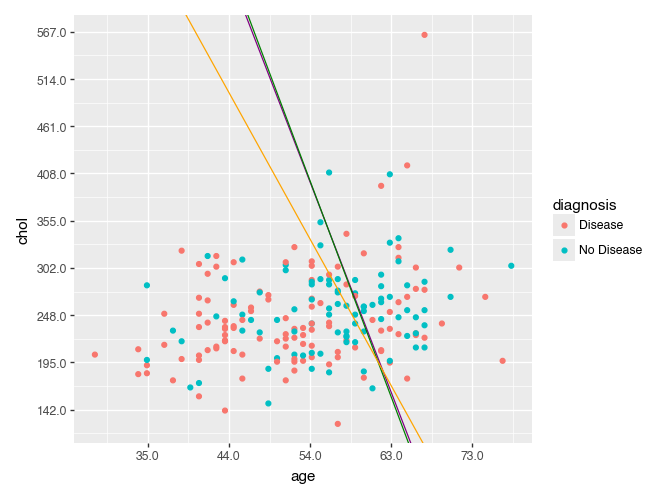

In [92]:
(ggplot(new_df, aes(x = "age_std", y = "chol_std", color = "diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "purple")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "green")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange")
+ scale_x_continuous(breaks = np.arange(-2, 3), labels = np.round(new_df["age"].mean() + new_df["age"].std() * np.arange(-2, 3), 0))
+ scale_y_continuous(breaks = np.arange(-2, 7), labels = np.round(new_df["chol"].mean() + new_df["chol"].std() * np.arange(-2, 7), 0))
+ labs(x = "age", y = "chol")
)